<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/CircuitElement_capacitance_charge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Capacitance</h1></b>

Dr. Bingsen Wang

4/12/2025
</center>

0
0
50
100
150
200
250
300
350
400
450
500
550
0


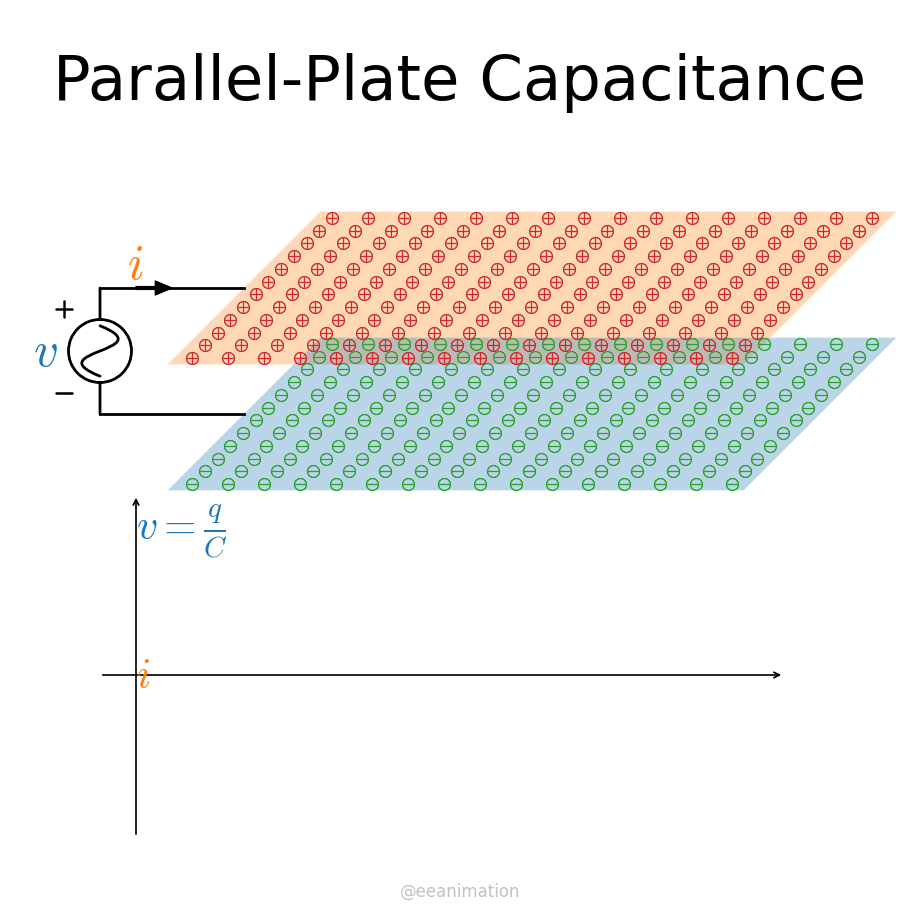

In [119]:
from matplotlib import pyplot,patches,cm,transforms,path,animation
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

def ct32(xyz): #cartesian 3d to 2d
  x,y,z = xyz
  return np.array([y-x*np.sin(np.pi/4)/2,z-x*np.cos(np.pi/4)/2])

#draw ac voltage source symbol
def draw_voltage_source_ac(ax,x0,y0,h,theta=0,lw=1,color='k',alpha=1):
    verts = [(0,0),(.25*h,0),(.75*h,0),(h,0),(.3*h,0),(.5*h,.5*h),(.5*h,-.5*h),(.7*h,0)]
    verts += list(path.Path.arc(0,360).vertices*.25*h+np.array([.5*h,0]))
    codes = [path.Path.MOVETO,path.Path.LINETO]*2 + [path.Path.MOVETO]+[path.Path.CURVE4]*3 + list(path.Path.arc(0,360).codes)
    t=transforms.Affine2D().translate(x0,y0)+transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=t))
    return

Nf=600
xy0 = np.array([0.2,.3])
d,w,l = .35,1.6,1.2
theta=np.linspace(0,2*np.pi,Nf)
ict,vct=-.4*np.sin(theta),.4*np.cos(theta)

# dx=dy=1-abs(.925*np.cos(theta))
dx=dy=np.sqrt(1/(abs(100*np.cos(theta)+.1)))
p1 = [ct32([l/2,-w/2,d/2]),ct32([l/2,w/2,d/2]),ct32([-l/2,w/2,d/2]),ct32([-l/2,-w/2,d/2])]  #points
p2 = [ct32([l/2,-w/2,-d/2]),ct32([l/2,w/2,-d/2]),ct32([-l/2,w/2,-d/2]),ct32([-l/2,-w/2,-d/2])]
cl = list(cm.tab10.colors) #color list
xylim=[-1.25,1.25]
fig = pyplot.figure(figsize=([9,9]))
ax= fig.add_axes([0,0,1,1],xlim=xylim,ylim=xylim); ax.axis('off')
ax1= fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25],fc='none'); ax1.axis('off')
pmax=[ct32((1,0,0)),ct32((0,1,0)),ct32((0,0,.6))]
pmin=[ct32((0,0,0)),ct32((0,0,0)),ct32((0,0,0))]
ax.text(0,1,"Parallel-Plate Capacitance",size=45,ha='center')
verts=[xy0+p for p in p1]+[(0,0)]
codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
ax.add_patch(patches.PathPatch(path.Path(verts,codes),lw=0,fc=cl[1],ec='none',alpha=0.3))
verts=[xy0+p for p in p2]+[(0,0)]
codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(verts)-2)+[path.Path.CLOSEPOLY]
ax.add_patch(patches.PathPatch(path.Path(verts,codes),lw=0,fc=cl[0],ec='none',alpha=0.3))
xy1 = np.array([-0.9,-.6])
ax.annotate('',xy1+np.array([1.8,0]),xy1+np.array([-.1,0]),arrowprops=dict(arrowstyle='->',lw=1.2,color='k'))
ax.annotate('',xy1+np.array([0,.5]),xy1+np.array([0,-.45]),arrowprops=dict(arrowstyle='->',lw=1.2,color='k'))
#source
[ax.plot([-w/2+xy0[0],-w/2-.4+xy0[0]],[xy0[1]+d*(.5-k),xy0[1]+d*(.5-k)],lw=2,c='k') for k in range(2)]
draw_voltage_source_ac(ax,xy0[0]-w/2-.4,xy0[1]-d/2,d,theta=90,lw=2)
ax.text(-w/2-.55+xy0[0],xy0[1],'$v$ ',c=cl[0],size=35,ha='center',va='center')
[ax.scatter(-w/2-.5+xy0[0],xy0[1]+d/3*[1,-1][k],s=150,marker=['$+$','$-$'][k],c='k')for k in range(2)]
ax.annotate('',xy0+np.array([-w/2-.2,d/2]),xy0+np.array([-w/2-.3,d/2]),arrowprops=dict(headwidth=10,width=2,color='k'))
ax.text(-w/2-.3+xy0[0],xy0[1]+d/2,'$i$ ',c=cl[1],size=35,ha='center',va='bottom')
lines=[ax.plot([],[],lw=3,c=cl[k])[0] for k in range(2)]
txts=[ax.text(0,0,[r'$v=\frac{q}{C}$','$i$'][k],size=30,c=cl[k],va='center') for k in range(2)]
def animate(i):
  # i=110
  if i%50==0:
    print(i)
  ax1.cla(); ax1.set_xlim(xylim); ax1.set_ylim(xylim);ax1.axis('off')
  [lines[k].set_data(theta[:i+1]/(2*np.pi)*1.6+xy1[0],[vct[:i+1],ict[:i+1]][k]+xy1[1]) for k in range(2)]
  [txts[k].set_position([theta[i]/(2*np.pi)*1.6+xy1[0],[vct[i],ict[i]][k]+xy1[1]]) for k in range(2)]

  nx = int(l//dx[i]); ny = int(w//dy[i])
  x,y=np.meshgrid(np.linspace(0,(nx-1)*dx[i],nx)-(l-dx[i]-l%dx[i])/2,np.linspace(0,(ny-1)*dy[i],ny)-(w-dy[i]-w%dy[i])/2)
  xx,yy=ct32([x,y,d/2+x*0])
  if vct[i]>0:
    ax1.scatter(xx+xy0[0],yy+xy0[1],s=80,marker='$\oplus$',ec=cl[3],fc=cl[0],lw=.5,zorder=3)
    ax1.scatter(xx+xy0[0],yy+xy0[1]-d,s=80,marker='$\ominus$',ec=cl[2],fc=cl[0],lw=.5,zorder=2)
  else:
    ax1.scatter(xx+xy0[0],yy+xy0[1]-d,s=80,marker='$\oplus$',ec=cl[3],fc=cl[0],lw=.5,zorder=3)
    ax1.scatter(xx+xy0[0],yy+xy0[1],s=80,marker='$\ominus$',ec=cl[2],fc=cl[0],lw=.5,zorder=2)
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("capChargingDis.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)